## 代表的な前処理（無相関化・白色化）
- 相関係数が高い場合、一方の変数のみで事象を説明できることが多い
- これでは使える情報が減ってしまうため、相関を解消する前処理を施す

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 無相関化

相関係数: 0.728


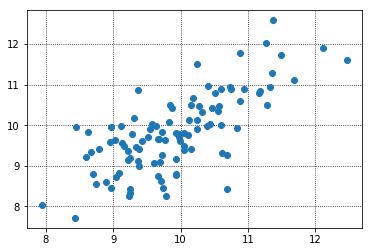

In [88]:
# 正の相関がある疑似データ
np.random.seed(1234)
data1 = np.random.multivariate_normal((10, 10), [[1, 0.8],[0.8, 1]], 100)
print('相関係数: {:.3f}'.format(np.corrcoef(data1[:, 0], data1[:, 1])[0,1]))

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1[:, 0], data1[:, 1], 'o')
plt.show()

In [89]:
#  無相関化を行うための一連の処理
cov = np.cov(data1, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data1_decorr = np.dot(S.T, data1.T).T #データを無相関化

相関係数: 0.000


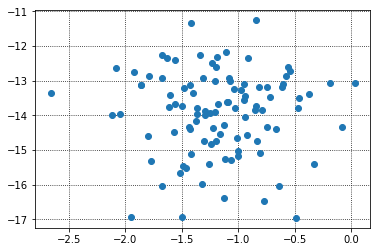

In [90]:
print('相関係数: {:.3f}'.format(np.corrcoef(data1_decorr[:, 0], data1_decorr[:, 1])[0,1]))
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1_decorr[:, 0], data1_decorr[:, 1], 'o')
plt.show()

- 無相関化によって説明変数間の相関がなくなったことがわかる
- ただし、スケールの影響がまだ残っているため次に標準化を施すことで、白色化を実現する

### 白色化

相関係数: 0.000


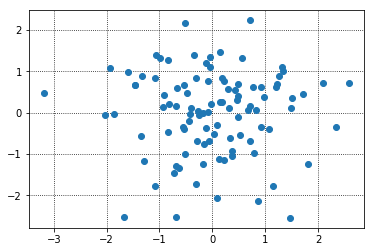

In [97]:
#  白色化を行うための一連の処理
stdsc = StandardScaler()
stdsc.fit(data1_decorr)
data1_whitening  = stdsc.transform(data1_decorr) # 無相関化したデータに対して、さらに標準化

print('相関係数: {:.3f}'.format(np.corrcoef(data1_whitening[:, 0], data1_whitening[:, 1])[0,1]))
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1_whitening[:, 0], data1_whitening[:, 1], 'o')
plt.show()